In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
df = pd.read_csv("neutron.csv")
df.head()

,vx,vy,vz,sci_photons,xpos0,ypos0,photons0,xpos1,ypos1,photons1,xpos2,ypos2,photons2,xpos3,ypos3,photons3
0,18.475800,4.87178,-0.557133,54915,-15.0,-15.0,54,-15.0,15.0,102,15.0,-15.0,94,15.0,15.0,149
1,9.640910,-17.91810,-1.192470,60710,-15.0,-15.0,60,-15.0,15.0,54,15.0,-15.0,988,15.0,15.0,66
2,-0.961985,-4.39377,7.472210,46149,-15.0,-15.0,116,-15.0,15.0,87,15.0,-15.0,112,15.0,15.0,76
3,-22.867600,15.59610,-4.929720,155435,-15.0,-15.0,200,-15.0,15.0,893,15.0,-15.0,109,15.0,15.0,173
4,-9.116600,11.90630,-4.312460,93,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1


## Make basic scatterplots

<Axes: xlabel='vx', ylabel='vy'>

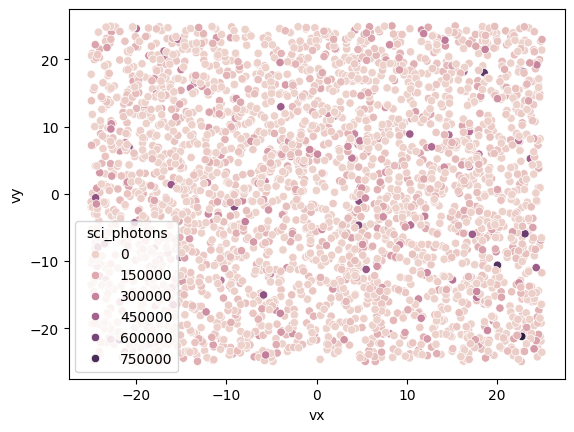

In [3]:
sns.scatterplot(data=df,x='vx',y='vy',hue="sci_photons")

<Axes: xlabel='vx', ylabel='photons0'>

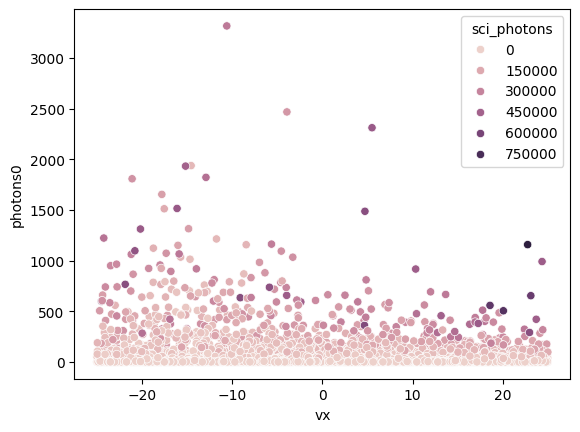

In [4]:
sns.scatterplot(data=df,x='vx',y='photons0',hue="sci_photons")

## Count instances of no photons being detected

In [5]:
tmp = np.zeros_like(df['photons0'],dtype=int)
nx = 2
ny = 2
n = nx * ny
for i in range(n):
    tmp += (df[f'photons{i}'] < 0)

NOPHOTONS = tmp == n

print("Number of rows with no detected photons:",sum(NOPHOTONS))
print("Number of rows with detectd photons:",sum(~NOPHOTONS))
print("Efficiency:",sum(~NOPHOTONS)/len(df["photons0"]))

Number of rows with no detected photons: 525
Number of rows with detectd photons: 2492
Efficiency: 0.8259860788863109


## Dynamically determine which columns are right or left

In [36]:
left_dropnames = [] # Columns to drop to get left subset
right_dropnames = [] # Columns to drop to get right subset
nx = 2
ny = 2
num = 0
for i in range(ny):
    for j in range(nx):
        if j < (nx / 2):
            print("left:",num)
            right_dropnames.append(f"photons{num}")
            right_dropnames.append(f"ypos{num}")
            right_dropnames.append(f"xpos{num}")
        else:
            print("right",num)
            left_dropnames.append(f"photons{num}")
            left_dropnames.append(f"ypos{num}")
            left_dropnames.append(f"xpos{num}")
        df = df[df[f'photons{num}'] != -1]
        num += 1
left

left: 0
right 1
left: 2
right 3


,vx,vy,vz,sci_photons,xpos0,ypos0,photons0,xpos2,ypos2,photons2,total
0,18.475800,4.87178,-0.557133,54915,-15.0,-15.0,54,15.0,-15.0,94,148
1,9.640910,-17.91810,-1.192470,60710,-15.0,-15.0,60,15.0,-15.0,988,1048
2,-0.961985,-4.39377,7.472210,46149,-15.0,-15.0,116,15.0,-15.0,112,228
3,-22.867600,15.59610,-4.929720,155435,-15.0,-15.0,200,15.0,-15.0,109,309
5,-0.802137,-17.42480,-2.518790,95125,-15.0,-15.0,327,15.0,-15.0,202,529
...,...,...,...,...,...,...,...,...,...,...,...
3011,5.491570,-11.23810,2.073740,481790,-15.0,-15.0,2311,15.0,-15.0,747,3058
3012,-18.243100,-5.36197,-9.151960,10371,-15.0,-15.0,41,15.0,-15.0,10,51
3013,-6.474580,20.89550,9.661240,3165,-15.0,-15.0,5,15.0,-15.0,4,9
3014,7.004070,-14.47280,-4.412980,88472,-15.0,-15.0,189,15.0,-15.0,300,489


In [7]:
left = df.drop(left_dropnames,axis=1)
right = df.drop(right_dropnames,axis=1)

In [16]:
n = nx * ny

left['total'] = np.zeros_like(left['vx']).astype(int)
right["total"] = np.zeros_like(right['vx']).astype(int)
df["total"] = np.zeros_like(df['vx']).astype(int)
for i in range(n):
    try:
        left['total'] = left['total'] + left[f"photons{i}"]
    except:
        pass
    try:
        right['total'] = right['total'] + right[f"photons{i}"]
    except:
        pass
    df['total'] = df['total'] + df[f"photons{i}"]

df['total']

0        399
1       1168
2        391
3       1375
5        731
        ... 
3011    4189
3012      86
3013      19
3014     718
3015    1939
Name: total, Length: 1898, dtype: int64

<Axes: xlabel='vx', ylabel='None'>

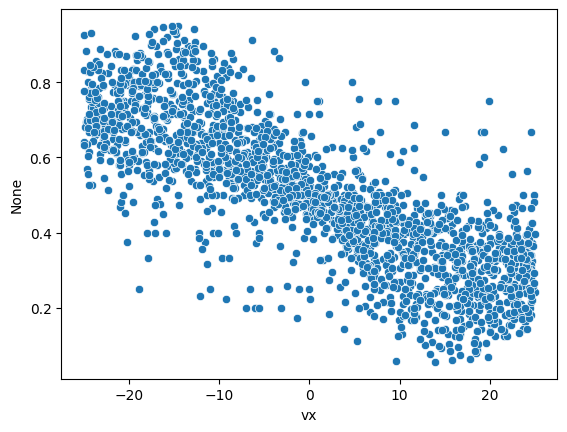

In [38]:
sns.scatterplot(data=left,x="vx",y=left['photons0']/left['total'])

<Axes: xlabel='vx', ylabel='None'>

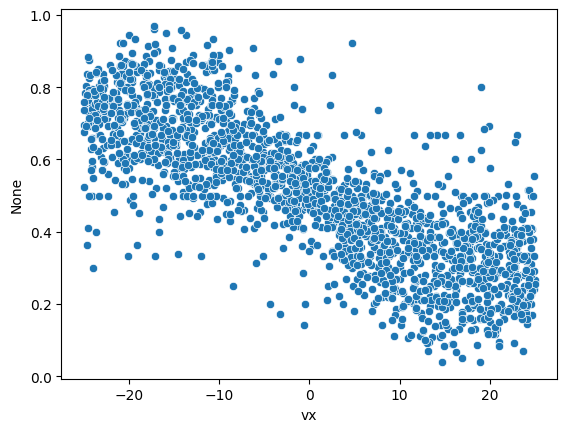

In [34]:
sns.scatterplot(x=right["vx"],y=right['photons1']/right['total'])

<Axes: xlabel='vx', ylabel='total'>

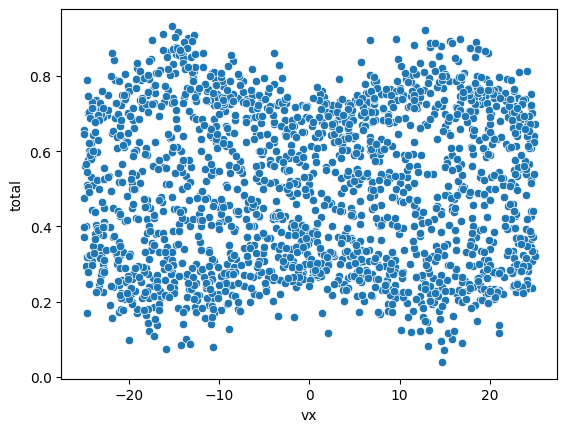

In [35]:
sns.scatterplot(x=df["vx"],y=left['total']/df['total'])